In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings


In [3]:
train = pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test = pd.read_csv('test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_original=train.copy()
test_original=test.copy()

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.shape

(614, 13)

In [10]:
test.shape


(367, 12)

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
train['Loan_Status'].value_counts(normalize=True) 


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

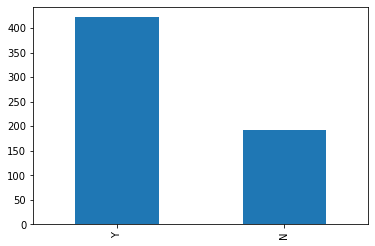

In [13]:
train['Loan_Status'].value_counts().plot.bar()

# univariate analysis

# Independent Variable (Categorical)


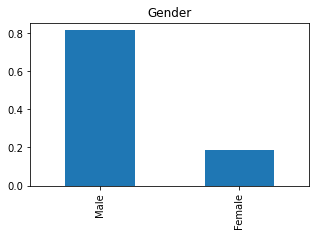

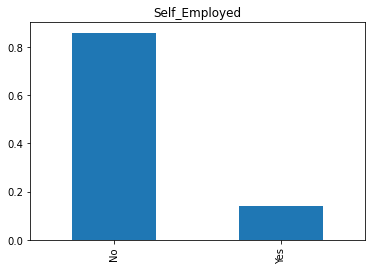

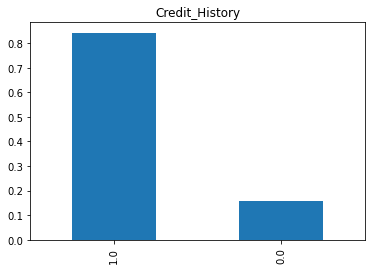

In [14]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(5,3), title='Gender')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()


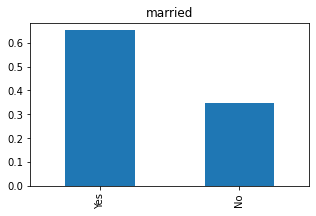

In [15]:
train['Married'].value_counts(normalize=True).plot.bar(figsize=(5,3),title='married')
plt.show() 

# Independent Variable (Ordinal)


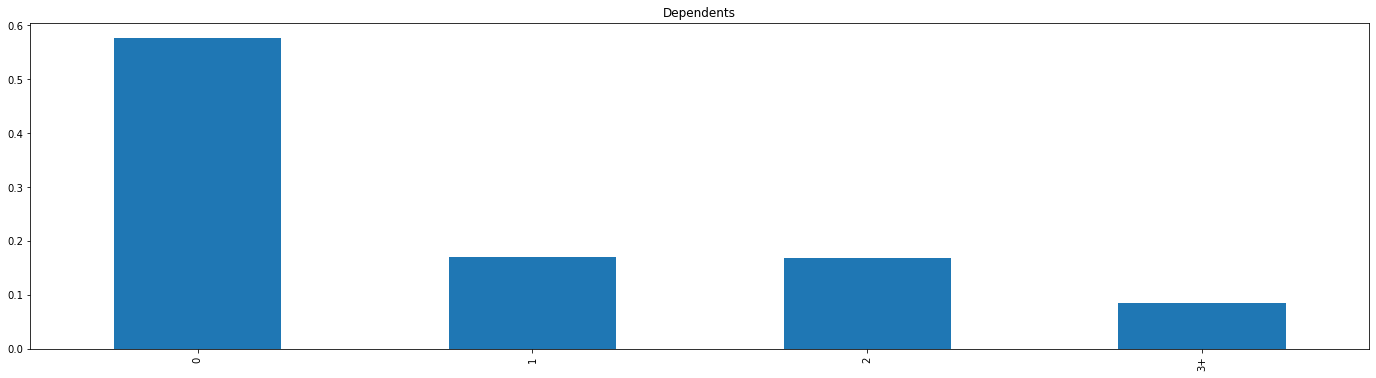

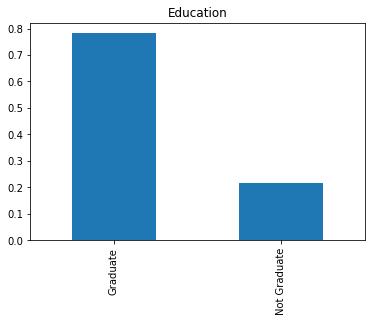

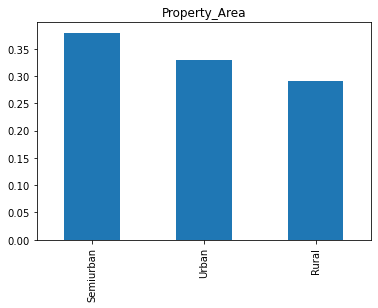

In [16]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()


# Independent Variable (Numerical)

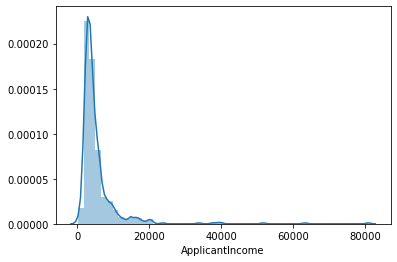

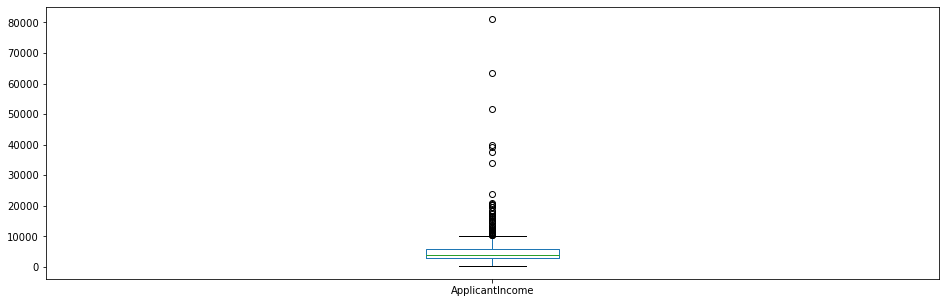

In [17]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Adarsh shekar\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

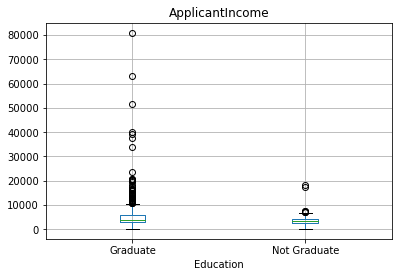

In [18]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

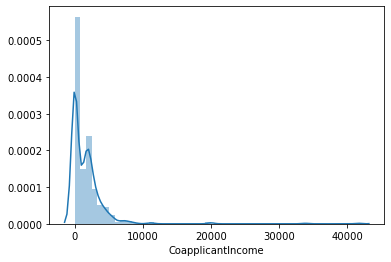

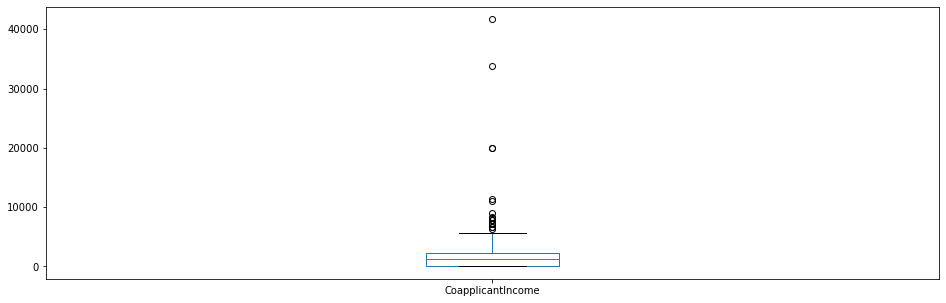

In [19]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

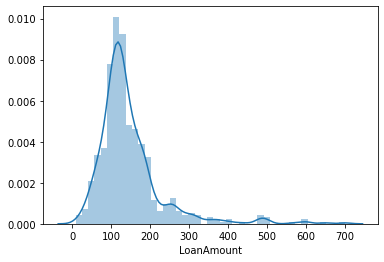

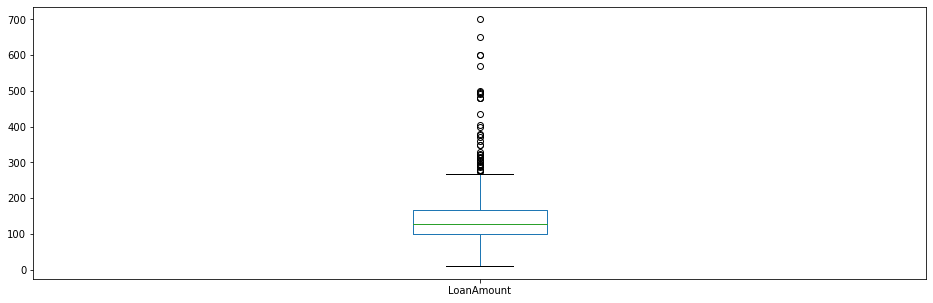

In [20]:
train.notna()
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()


# Bivariate Analysis


# Categorical Independent Variable vs Target Variable


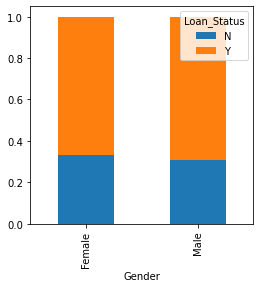

In [21]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

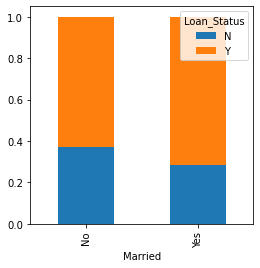

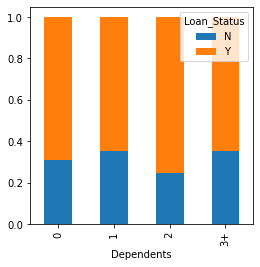

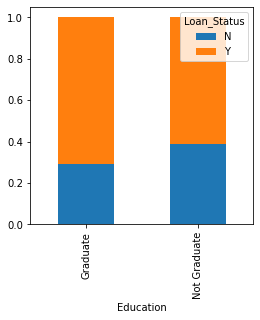

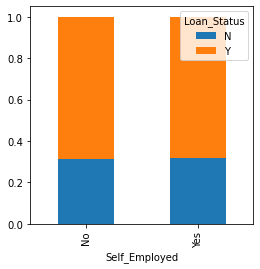

In [22]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

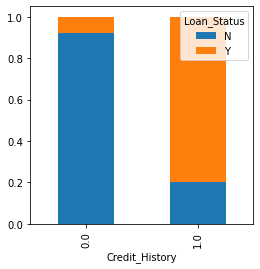

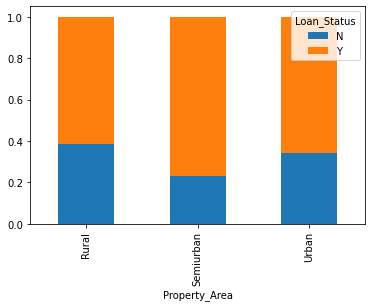

In [23]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

# Numerical Independent Variable vs Target Variable

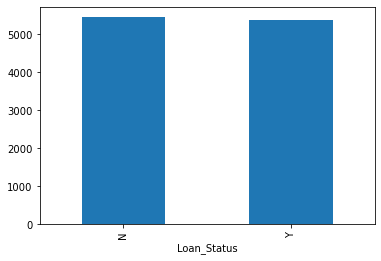

In [24]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

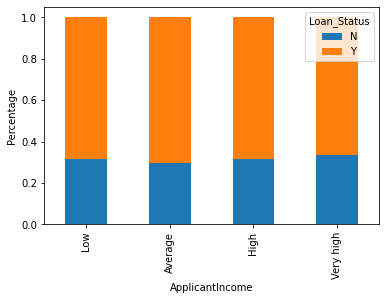

In [25]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')


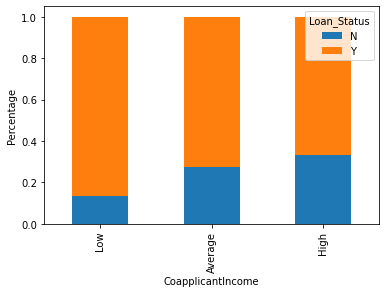

In [26]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')


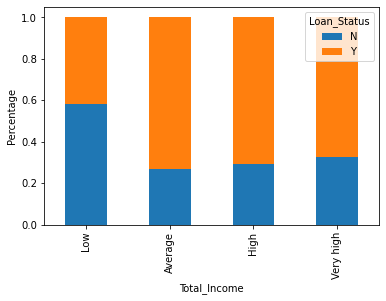

In [27]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

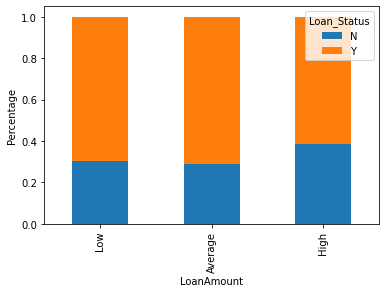

In [28]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [29]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

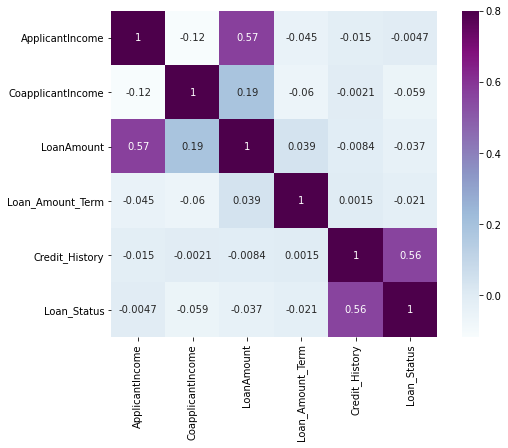

In [30]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)


# Missing value imputation

In [31]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [33]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [34]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [35]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [36]:
train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

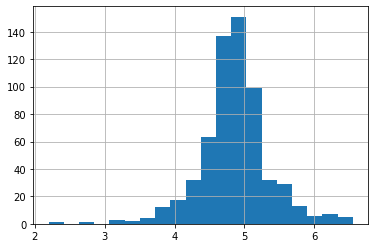

In [38]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])


# Feature Engineering

In [39]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [40]:
X = train.drop('Loan_Status',1)


In [41]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [42]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

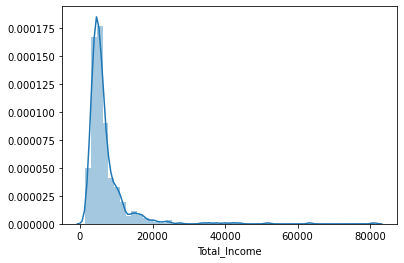

In [43]:
sns.distplot(train['Total_Income'])

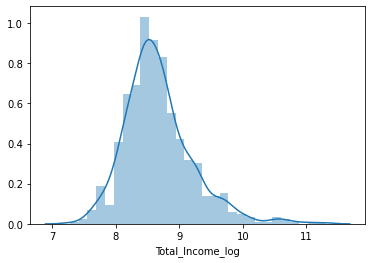

In [44]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [45]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

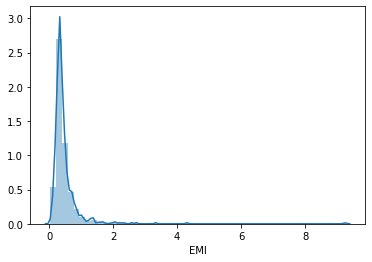

In [46]:
sns.distplot(train['EMI'])

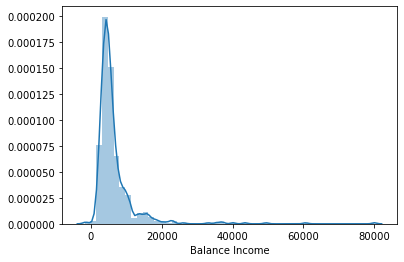

In [47]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

Let us now drop the variables which we used to create these new features. The reason for doing this is, the correlation between those old features and these new features will be very high, and logistic regression assumes that the variables are not highly correlated. We also want to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [48]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)


In [49]:
train

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,4.852030,0,1,1,0,0,1,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,4.852030,0,1,0,1,0,0,1,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,4.189655,0,1,0,1,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,4.787492,0,1,0,1,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,4.948760,0,1,1,0,0,1,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1,4.262680,1,0,1,0,0,1,0,...,0,1,0,1,0,0,2900.0,7.972466,0.197222,2702.777778
610,1.0,1,3.688879,0,1,0,1,1,0,0,...,0,1,0,1,0,0,4106.0,8.320205,0.222222,3883.777778
611,1.0,1,5.533389,0,1,0,1,0,0,1,...,0,1,0,0,0,1,8312.0,9.025456,0.702778,7609.222222
612,1.0,1,5.231109,0,1,0,1,0,0,0,...,0,1,0,0,0,1,7583.0,8.933664,0.519444,7063.555556


In [50]:
train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

In [51]:
train=train[['Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income', 'Loan_Status']]

# feature engineering

### Recursive Feature Elimination

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [53]:
X = train.iloc[:,0:21]
Y = train.iloc[:,21]

In [54]:
model = LogisticRegression(max_iter=400)
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)

C:\Users\Adarsh shekar\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [55]:
#Num Features: 
fit.n_features_

5

In [56]:
#Selected Features:
fit.support_

array([ True, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False])

In [57]:
# Feature Ranking:
fit.ranking_

array([ 1,  3, 12,  9,  1,  2, 11, 10,  1,  4,  6,  1, 14, 13,  5,  1,  7,
       16,  8, 17, 15])

In [58]:
X.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

### Feature Importance using Decision Tree

In [59]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.29220087 0.12122349 0.00911639 0.01437065 0.00262596 0.01688321
 0.00115317 0.0116196  0.00718613 0.00547441 0.         0.01006007
 0.00714497 0.03398641 0.00577372 0.01138747 0.008841   0.07280579
 0.13853361 0.14966009 0.07995298]


In [60]:
X.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

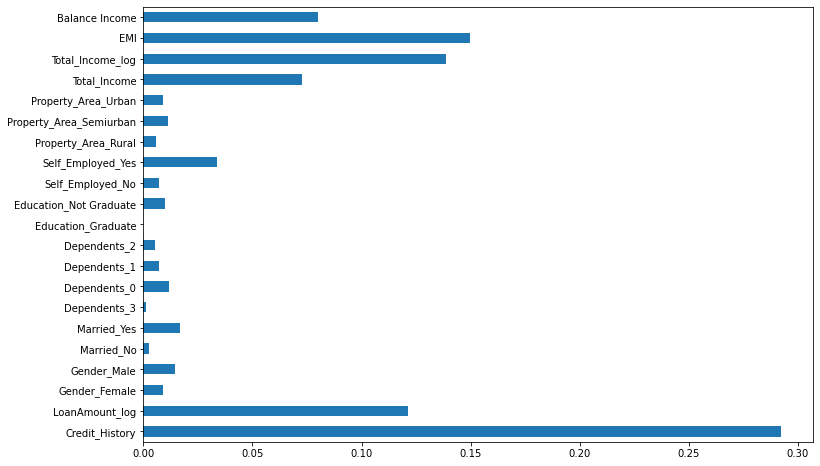

In [61]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.

## handling the imbalanced data

In [62]:
data_table=pd.DataFrame()
data_table['technique']=['Original data']
data_table['X_shape']=[X.shape[0]]
data_table['Y_shape']=[Y.shape[0]]
data_table['target_0']=[Y.value_counts()[0]]
data_table['target_1']=[Y.value_counts()[1]]

data_table

,technique,X_shape,Y_shape,target_0,target_1
0,Original data,614,614,192,422


### Undersampling- near miss

In [63]:
from imblearn.under_sampling import NearMiss
nm =NearMiss()
X_nm,Y_nm=nm.fit_resample(X,Y)

In [64]:
new_row={
    'technique':'UNDER SAMPLING-NEAR MISS',
    'X_shape' :X_nm.shape[0],
    'Y_shape' :Y_nm.shape[0],
    'target_0' :Y_nm.value_counts()[0],
    'target_1' :Y_nm.value_counts()[1]
}
data_table=data_table.append(new_row, ignore_index=True)
data_table

,technique,X_shape,Y_shape,target_0,target_1
0,Original data,614,614,192,422
1,UNDER SAMPLING-NEAR MISS,384,384,192,192


### Undersampling- Randomundersampler

In [65]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(sampling_strategy=0.5, replacement= True)
X_us,Y_us=us.fit_resample(X,Y)

In [66]:
new_row={
    'technique':'UNDER SAMPLING-RandomUnderSampler',
    'X_shape' :X_us.shape[0],
    'Y_shape' :Y_us.shape[0],
    'target_0' :Y_us.value_counts()[0],
    'target_1' :Y_us.value_counts()[1]
}
data_table=data_table.append(new_row, ignore_index=True)
data_table

,technique,X_shape,Y_shape,target_0,target_1
0,Original data,614,614,192,422
1,UNDER SAMPLING-NEAR MISS,384,384,192,192
2,UNDER SAMPLING-RandomUnderSampler,576,576,192,384


### Oversampling

In [67]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X_os,Y_os=os.fit_resample(X,Y)

In [68]:
new_row={
    'technique':'OVER SAMPLING',
    'X_shape' :X_os.shape[0],
    'Y_shape' :Y_os.shape[0],
    'target_0' :Y_os.value_counts()[0],
    'target_1' :Y_os.value_counts()[1]
}
data_table=data_table.append(new_row, ignore_index=True)
data_table

,technique,X_shape,Y_shape,target_0,target_1
0,Original data,614,614,192,422
1,UNDER SAMPLING-NEAR MISS,384,384,192,192
2,UNDER SAMPLING-RandomUnderSampler,576,576,192,384
3,OVER SAMPLING,844,844,422,422


In [69]:
os2=RandomOverSampler(sampling_strategy=0.5)
X_os2,Y_os2=os2.fit_resample(X,Y)

new_row={
    'technique':'OVER SAMPLING-HALF',
    'X_shape' :X_os2.shape[0],
    'Y_shape' :Y_os2.shape[0],
    'target_0' :Y_os2.value_counts()[0],
    'target_1' :Y_os2.value_counts()[1]
}
data_table=data_table.append(new_row, ignore_index=True)
data_table

,technique,X_shape,Y_shape,target_0,target_1
0,Original data,614,614,192,422
1,UNDER SAMPLING-NEAR MISS,384,384,192,192
2,UNDER SAMPLING-RandomUnderSampler,576,576,192,384
3,OVER SAMPLING,844,844,422,422
4,OVER SAMPLING-HALF,633,633,211,422


### SMOTE-minority

In [70]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy='minority')
X_smote,Y_smote=smote.fit_resample(X,Y)

In [71]:
new_row={
    'technique':'SMOTE-minority',
    'X_shape' :X_smote.shape[0],
    'Y_shape' :Y_smote.shape[0],
    'target_0' :Y_smote.value_counts()[0],
    'target_1' :Y_smote.value_counts()[1]
}
data_table=data_table.append(new_row, ignore_index=True)
data_table

,technique,X_shape,Y_shape,target_0,target_1
0,Original data,614,614,192,422
1,UNDER SAMPLING-NEAR MISS,384,384,192,192
2,UNDER SAMPLING-RandomUnderSampler,576,576,192,384
3,OVER SAMPLING,844,844,422,422
4,OVER SAMPLING-HALF,633,633,211,422
5,SMOTE-minority,844,844,422,422


### SMOTETomek-minority

In [72]:
from imblearn.combine import SMOTETomek
smotemek= SMOTETomek(sampling_strategy='minority')
X_smotemek,Y_smotemek=smotemek.fit_resample(X,Y)

In [73]:
new_row={
    'technique':'SMOTETomek-minority',
    'X_shape' :X_smotemek.shape[0],
    'Y_shape' :Y_smotemek.shape[0],
    'target_0' :Y_smotemek.value_counts()[0],
    'target_1' :Y_smotemek.value_counts()[1]
}
data_table=data_table.append(new_row, ignore_index=True)
data_table

,technique,X_shape,Y_shape,target_0,target_1
0,Original data,614,614,192,422
1,UNDER SAMPLING-NEAR MISS,384,384,192,192
2,UNDER SAMPLING-RandomUnderSampler,576,576,192,384
3,OVER SAMPLING,844,844,422,422
4,OVER SAMPLING-HALF,633,633,211,422
5,SMOTE-minority,844,844,422,422
6,SMOTETomek-minority,694,694,347,347


By comparing all the sampling technique , we found that SMOTE-minority technique is best of all because it will reduce the problem of overfitting and loss of useful information.

## train_test_split validation techniques

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X_smote,Y_smote, test_size=0.3)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

C:\Users\Adarsh shekar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7992125984251969

In [77]:
pred_test = model.predict(test)

In [78]:
accuracy_score(y_cv,pred_cv)

0.7992125984251969

In [79]:
y_pred = model.predict(X_smote)

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_smote,y_pred)
print (confusion_matrix)


[[309 113]
 [ 35 387]]


In [81]:
pd.crosstab(y_pred,Y_smote) 

Loan_Status,0,1
row_0,,
0,309,35
1,113,387


In [82]:
from sklearn.metrics import classification_report 
print (classification_report (Y_smote, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       422
           1       0.77      0.92      0.84       422

    accuracy                           0.82       844
   macro avg       0.84      0.82      0.82       844
weighted avg       0.84      0.82      0.82       844



# Logistic Regression using stratified k-folds cross-validation

In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

In [86]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_smote,Y_smote):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X_smote.loc[train_index],X_smote.loc[test_index]
 ytr,yvl = Y_smote[train_index],Y_smote[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 m = log_loss(yvl,  pred_test) 
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" %m)



1 of kfold 5 
accuracy_score 0.8224852071005917

2 of kfold 5 


C:\Users\Adarsh shekar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Adarsh shekar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

accuracy_score 0.8402366863905325

3 of kfold 5 
accuracy_score 0.834319526627219

4 of kfold 5 


C:\Users\Adarsh shekar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Adarsh shekar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

accuracy_score 0.8402366863905325

5 of kfold 5 
accuracy_score 0.8452380952380952

 Mean Validation Accuracy 0.8365032403493942
Log_loss: 5.345396


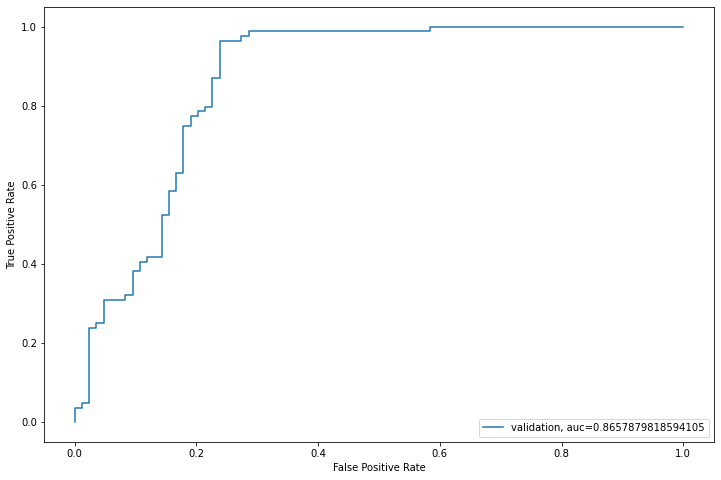

In [87]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Decision tree

In [88]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_smote,Y_smote):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X_smote.loc[train_index],X_smote.loc[test_index]
    ytr,yvl = Y_smote[train_index],Y_smote[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    m = log_loss(yvl,  pred_test) 
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" %m)


1 of kfold 5 
accuracy_score 0.7810650887573964

2 of kfold 5 
accuracy_score 0.7928994082840237

3 of kfold 5 
accuracy_score 0.7810650887573964

4 of kfold 5 
accuracy_score 0.7514792899408284

5 of kfold 5 
accuracy_score 0.7916666666666666

 Mean Validation Accuracy 0.7796351084812623
Log_loss: 7.195688


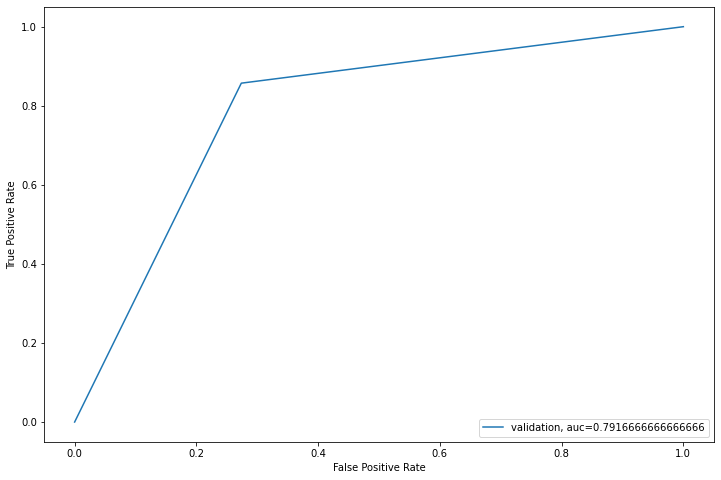

In [89]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_smote,Y_smote):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X_smote.loc[train_index],X_smote.loc[test_index]
 ytr,yvl = Y_smote[train_index],Y_smote[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 m = log_loss(yvl,  pred_test) 
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" %m)


1 of kfold 5 
accuracy_score 0.8698224852071006

2 of kfold 5 
accuracy_score 0.8757396449704142

3 of kfold 5 
accuracy_score 0.8579881656804734

4 of kfold 5 
accuracy_score 0.8224852071005917

5 of kfold 5 
accuracy_score 0.8214285714285714

 Mean Validation Accuracy 0.8494928148774303
Log_loss: 6.167748


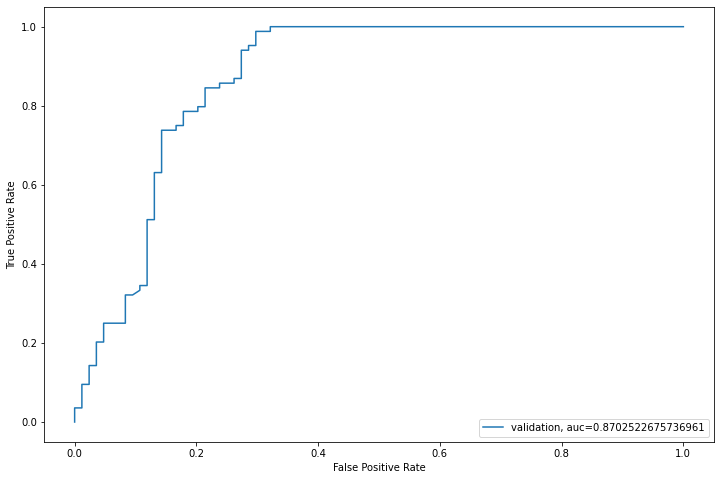

In [92]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Grid Search

In [93]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators;': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)


In [94]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_smote,Y_smote):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X_smote.loc[train_index],X_smote.loc[test_index]
    ytr,yvl = Y_smote[train_index],Y_smote[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    m = log_loss(yvl,  pred_test) 
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" %m)


1 of kfold 5 
accuracy_score 0.8579881656804734

2 of kfold 5 
accuracy_score 0.8461538461538461

3 of kfold 5 
accuracy_score 0.8461538461538461

4 of kfold 5 
accuracy_score 0.7633136094674556

5 of kfold 5 
accuracy_score 0.7738095238095238

 Mean Validation Accuracy 0.817483798253029
Log_loss: 7.812485


# XGBOOST

In [95]:
from xgboost import XGBClassifier
i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X_smote,Y_smote): 
 print('\n{} of kfold {}'.format(i,kf.n_splits)) 
 xtr,xvl = X_smote.loc[train_index],X_smote.loc[test_index] 
 ytr,yvl = Y_smote[train_index],Y_smote[test_index] 
 model = XGBClassifier(n_estimators=50, max_depth=4) 
 model.fit(xtr, ytr) 
 pred_test = model.predict(xvl) 
 score = accuracy_score(yvl,pred_test) 
 m = log_loss(yvl,  pred_test) 
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" %m)


1 of kfold 5


C:\Users\Adarsh shekar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8816568047337278

2 of kfold 5
[09:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.834319526627219

3 of kfold 5


C:\Users\Adarsh shekar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adarsh shekar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8520710059171598

4 of kfold 5
[09:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score

C:\Users\Adarsh shekar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adarsh shekar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


 0.8165680473372781

5 of kfold 5
[09:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8273809523809523

 Mean Validation Accuracy 0.8423992673992673
Log_loss: 5.962151


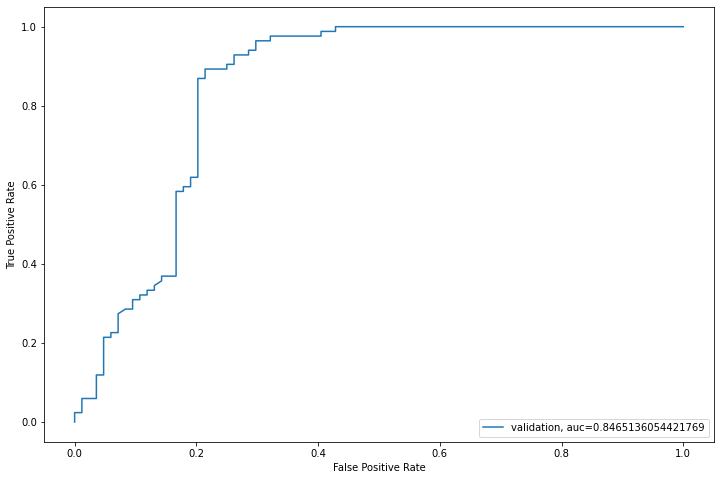

In [96]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [96]:
# ! pip install xgboost

# SVM

In [97]:
from sklearn.svm import SVC

In [98]:
svm= SVC()
svm.fit(x_train, y_train)
SVC()

SVC()

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_smote,Y_smote,train_size=20)

In [100]:
from sklearn.metrics import accuracy_score
svm = SVC()
svm.fit(X_train,y_train)
y_predict=svm.predict(X_test)
accuracy_score(y_test,y_predict)

0.5169902912621359